In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
data = np.loadtxt('/content/drive/MyDrive/Data/Pattern/test-Minimum-Error-Rate-Classifier.txt',delimiter=",",dtype='float64')
print(data)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[[ 1.   1. ]
 [ 1.  -1. ]
 [ 4.   5. ]
 [-2.   2.5]
 [ 0.   2. ]
 [ 2.  -3. ]]


# ***Task 01***

In [ ]:
u1 = np.array([0., 0.])               
Z1 = np.array([[0.25, 0.3],[0.3, 1]])   
p_w1 = 0.5                             


u2 = np.array([2., 2.])         
Z2 = np.array([[0.5, 0],[0, 0.5]])  
p_w2 = 0.5 

def NormalDistribution(x, u, Z):  
    k = len(u) 
    uk = u.copy() 
    xi = x.copy()

    a = 1.0 / np.sqrt(((2 * 3.14159) ** k) * np.linalg.det(Z))
    b = -0.5 * (np.dot(np.transpose(xi - uk), np.linalg.inv(Z)).dot(xi - uk))   

    result = a * np.exp(b)
    return result 

In [ ]:
x_class1=[]
y_class1=[]
x_class2=[]
y_class2=[]

for x in data:     
    posterior1 = NormalDistribution(np.array([x[0],x[1]]), u1, Z1) * p_w1 
    posterior2 = NormalDistribution(np.array([x[0],x[1]]), u2, Z2) * p_w2 
    print( posterior1, posterior2)
    if( posterior1> posterior2):
        x_class1.append(x[0])
        y_class1.append(x[1])
        print("Sample Point: ",x[0]," ", x[1]) 
        print("class 1\n") 
    else:
        x_class2.append(x[0])
        y_class2.append(x[1])
        print("Sample Point: ",x[0]," ", x[1]) 
        print("class 2\n")

0.026095753724665355 0.021539297495314906
Sample Point:  1.0   1.0
class 1

0.0006137133040176839 7.225629340952329e-06
Sample Point:  1.0   -1.0
class 1

2.4419422444312502e-15 3.597429019988373e-07
Sample Point:  4.0   5.0
class 2

4.763873217348531e-13 1.394874604808972e-08
Sample Point:  -2.0   2.5
class 2

0.008740982596274385 0.002915026927246105
Sample Point:  0.0   2.0
class 1

8.523215915379237e-15 2.2103367824833958e-12
Sample Point:  2.0   -3.0
class 2



# ***Task 02***

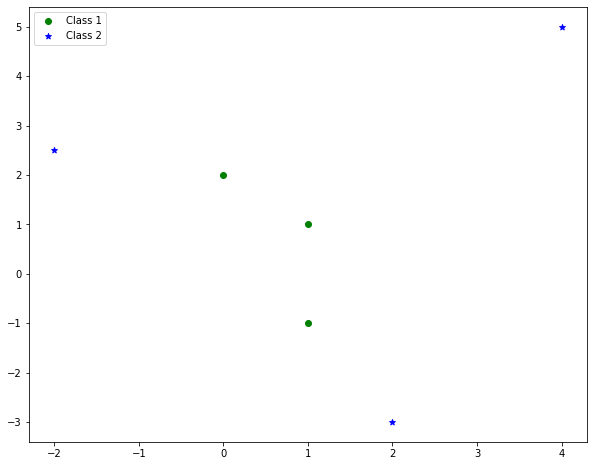

In [ ]:
plt.figure(figsize = (10, 8))

plt.scatter(x_class1,y_class1,marker='o',color='green',label='Class 1')
plt.scatter(x_class2,y_class2,marker='*',color='blue',label='Class 2')

plt.legend()
plt.show()

# ***Task 03***

In [ ]:
def multivariate_gaussian(pos, mu, cov):
    dimen = mu.shape[0]
    cov_det = np.linalg.det(cov)
    cov_inv = np.linalg.inv(cov)
    N = np.sqrt((2*np.pi)**dimen * cov_det)
    ans= np.einsum('...a,ab,...b->...', pos-mu, cov_inv, pos-mu)
    return np.exp(-ans / 2) / N

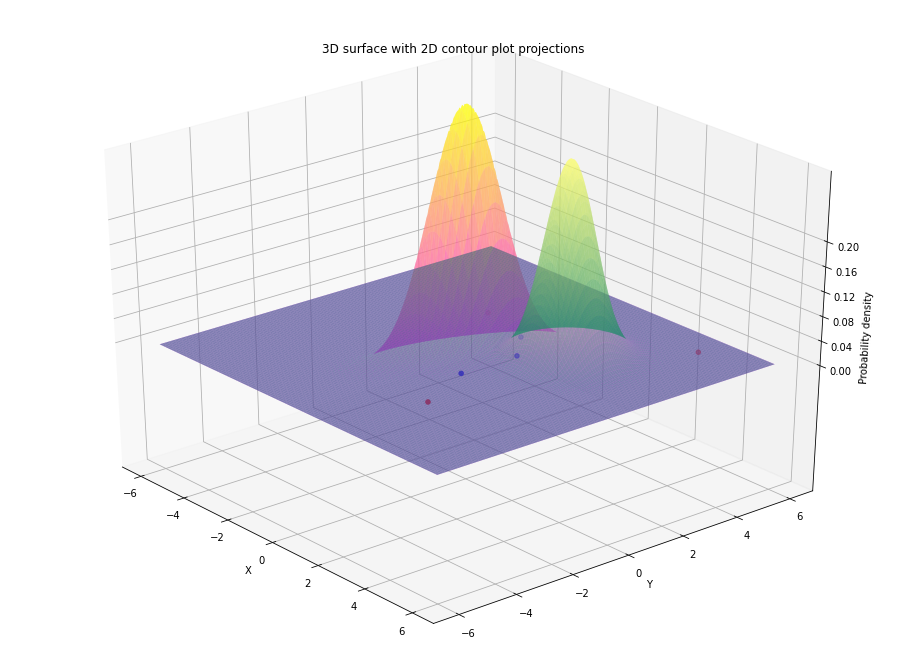

In [ ]:
X = np.linspace(-6, 6, 500)
Y = np.linspace(-6, 6, 500)
X, Y = np.meshgrid(X, Y)


u1 = np.array([0., 0.])                 
Z1 = np.array([[0.25, 0.3],[0.3, 1]])   

u2 = np.array([2., 2.])             
Z2 = np.array([[0.5, 0],[0, 0.5]])  


pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y

Ga1 = multivariate_gaussian(pos, u1, Z1)
Ga2 = multivariate_gaussian(pos, u2, Z2)

fig = plt.figure(figsize = (16, 12))
ax = fig.gca(projection='3d')

z=0
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Probability density')
ax.scatter(x_class1,y_class1, z,color='blue')
ax.scatter(x_class2,y_class2, z,color='red')
ax.plot_surface(X, Y, Ga1, rstride=3, cstride=5, linewidth=2, antialiased=True,cmap=cm.spring, alpha=0.5)
ax.plot_surface(X, Y, Ga2, rstride=3, cstride=5, linewidth=2, antialiased=True,cmap=cm.summer, alpha=0.5)
ax.set_title('3D surface with 2D contour plot projections')
ax.set_zlim(-0.2,0.3)
ax.set_zticks(np.linspace(0,0.2,6))
ax.view_init(30, -40)
plt.show()

# ***Task 04***

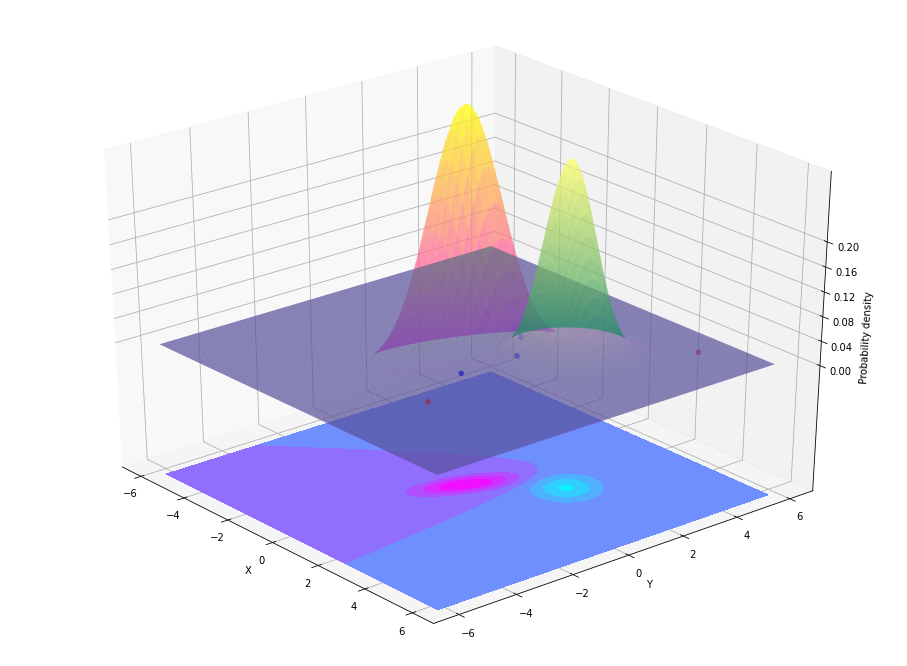

In [ ]:
fig = plt.figure(figsize = (16, 12))
ax = fig.gca(projection='3d')
decision=Ga1-Ga2
z=0
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Probability density')
ax.scatter(x_class1,y_class1, z,color='blue')
ax.scatter(x_class2,y_class2, z,color='red')
ax.plot_surface(X, Y, Ga1, rstride=3, cstride=5, linewidth=2, antialiased=True,cmap=cm.spring, alpha=0.5)
ax.plot_surface(X, Y, Ga2, rstride=3, cstride=5, linewidth=2, antialiased=True,cmap=cm.summer, alpha=0.5)
ax.contourf(X, Y, decision, zdir='z', offset=-0.22, cmap=cm.cool)
ax.set_zlim(-0.2,0.3)
ax.set_zticks(np.linspace(0,0.2,6))
ax.view_init(30, -40)
plt.show()